# Supermarket Sales Explanatory Data Analytics 

### https://www.kaggle.com/aungpyaeap/supermarket-sales

### Import Library

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Load the dataset

In [19]:
raw_df = pd.read_csv('./supermarket_sales - Sheet1.csv')
raw_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Data Analysis

In [20]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [21]:
raw_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [22]:
raw_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Resetting index as DateTime

In [23]:
df = raw_df.copy()

In [24]:
df['date_time'] = df['Date'] +" " +df['Time'] 
df['date_time'] = pd.to_datetime(df['date_time'])
df.set_index('date_time',inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
date_time,,,,,,,,,,,,,,,,,
2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [25]:
df.drop(['Date','Time'],axis=1,inplace=True)

## Data Visualization

In [46]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

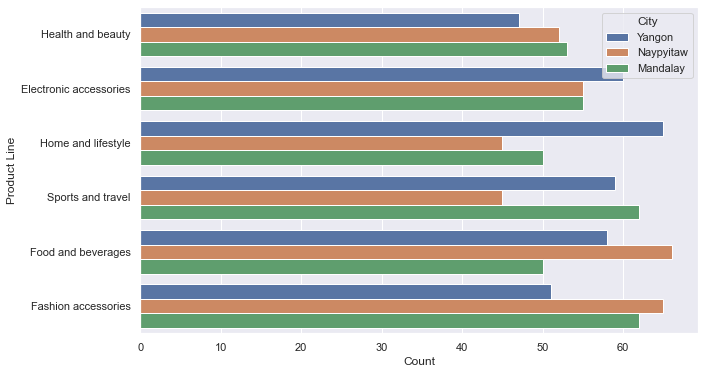

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(y='Product line', hue='City', data=df)
plt.xlabel('Count')
plt.ylabel('Product Line')
plt.show();

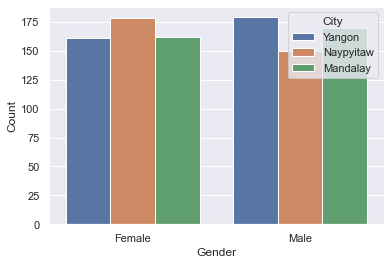

In [44]:
sns.countplot(x='Gender', hue='City', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

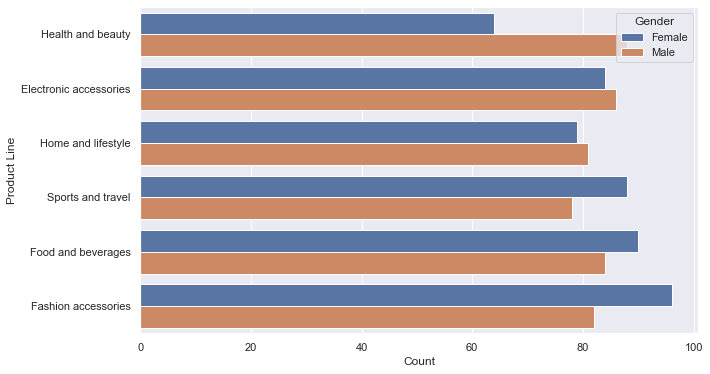

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(y='Product line', hue='Gender', data=df)
plt.xlabel('Count')
plt.ylabel('Product Line')
plt.show();

In [58]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

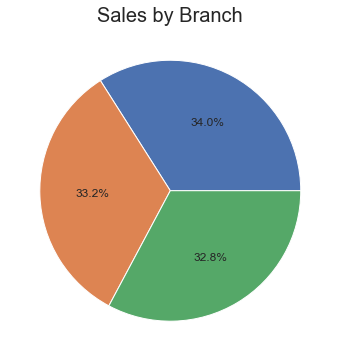

In [74]:
plt.figure(figsize=(10,6))
plt.pie(df['Branch'].value_counts(),autopct='%1.1f%%')
plt.title('Sales by Branch',fontsize=20)
plt.show()

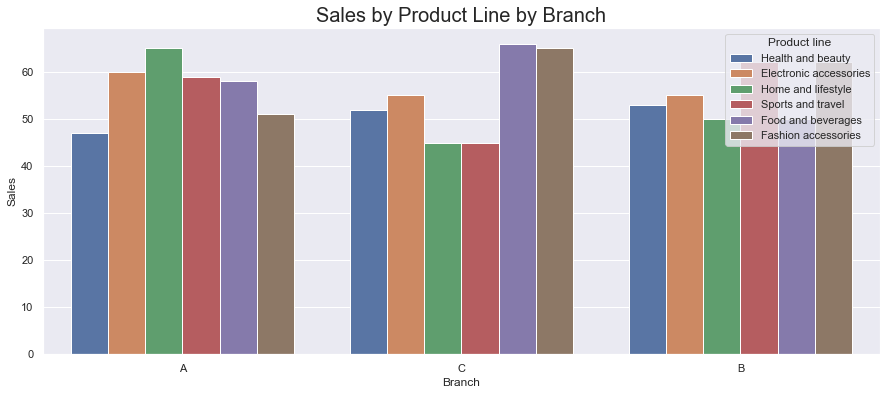

In [78]:
plt.figure(figsize=(15,6))
plt.title('Sales by Product Line by Branch',fontsize=20)
sns.countplot(x=df['Branch'],hue=df['Product line'])
plt.ylabel('Sales')
plt.show()

In [96]:
branchAData=df.loc[df['Branch'] == 'A']
branchBData=df.loc[df['Branch'] == 'B']
branchCData=df.loc[df['Branch'] == 'C']

In [103]:
def gross_income_pr_branch(branch_df,branch_name):
    plt.figure(figsize=(12,6))
    plt.title('Gross Income by Product Line in Branch '+branch_name,fontsize=20)
    sns.barplot(x='Product line',y='gross income',data=branch_df,estimator=sum)
    plt.ylabel('Gross Income')
    plt.show()

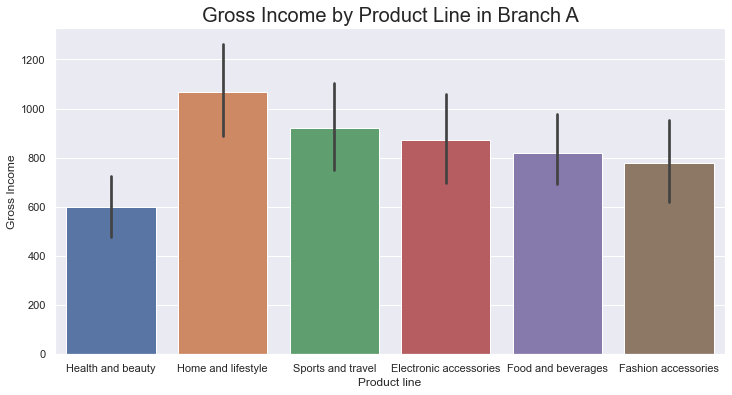

In [104]:
gross_income_pr_branch(branch_name='A',branch_df = branchAData)

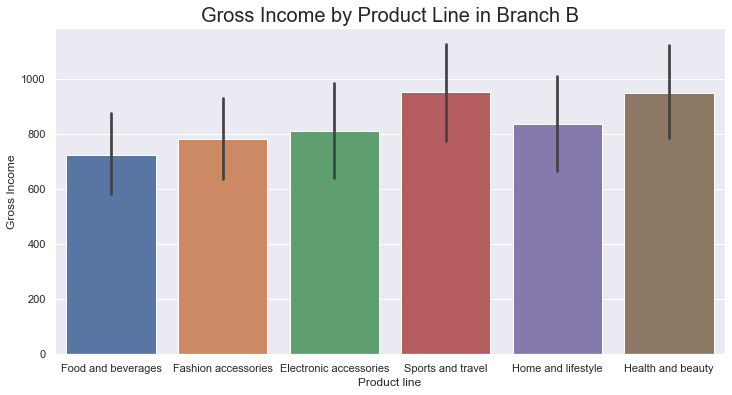

In [105]:
gross_income_pr_branch(branch_name='B',branch_df = branchBData)

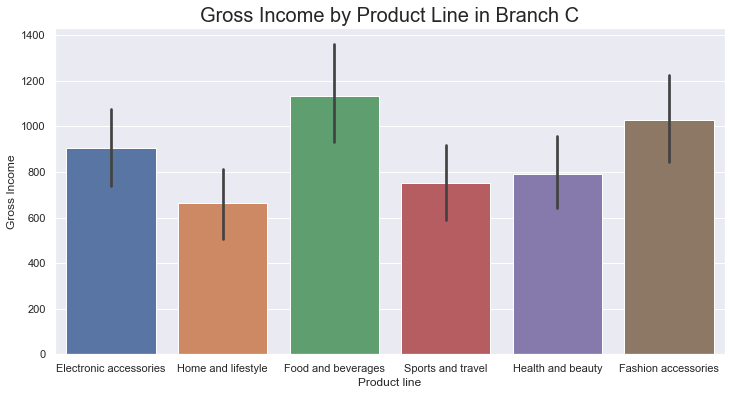

In [106]:
gross_income_pr_branch(branch_name='C',branch_df = branchCData)

In [107]:
def gross_income_pr_branch_wrt_cust_type(branch_df,branch_name):
    plt.figure(figsize=(12,6))
    plt.title('Gross Income by Product Line in Branch '+branch_name,fontsize=20)
    sns.barplot(x='Product line',y='gross income',hue='Customer type',data=branch_df,estimator=sum)
    plt.ylabel('Gross Income')
    plt.show()

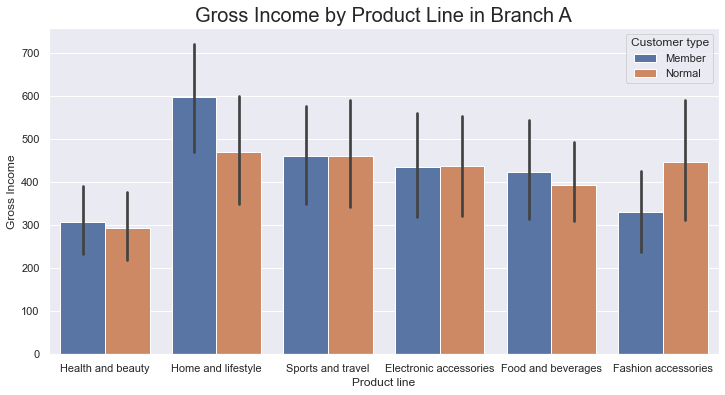

In [110]:
gross_income_pr_branch_wrt_cust_type(branch_name='A',branch_df = branchAData)

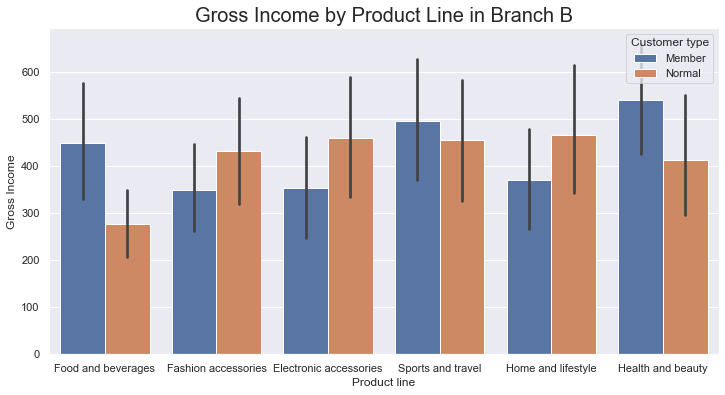

In [109]:
gross_income_pr_branch_wrt_cust_type(branch_name='B',branch_df = branchBData)

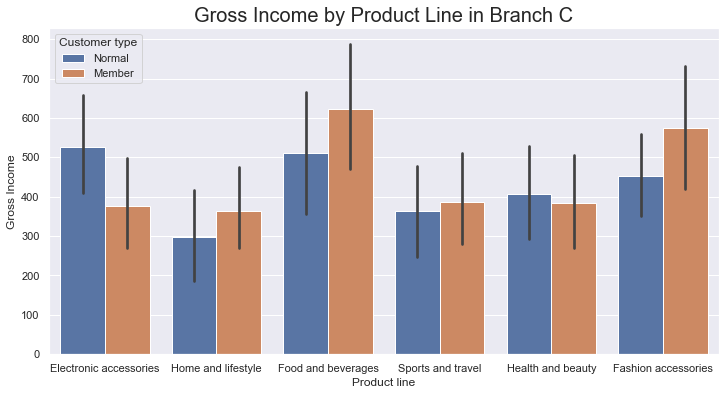

In [108]:
gross_income_pr_branch_wrt_cust_type(branch_name='C',branch_df = branchCData)

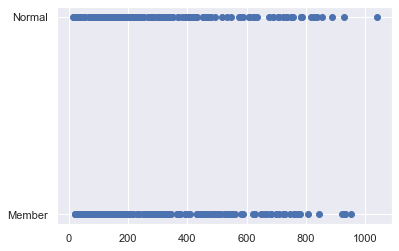

In [119]:
plt.scatter(branchAData.Total,branchAData['Customer type'])

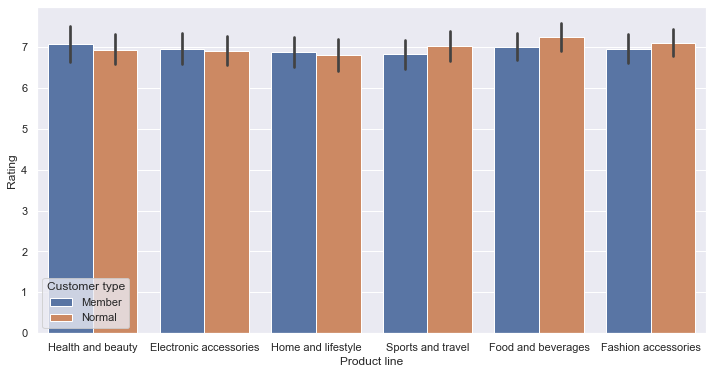

In [126]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product line',y='Rating',data=df, hue='Customer type')
plt.show()

Text(0.5, 1.0, 'Frequency of Transaction made per day')

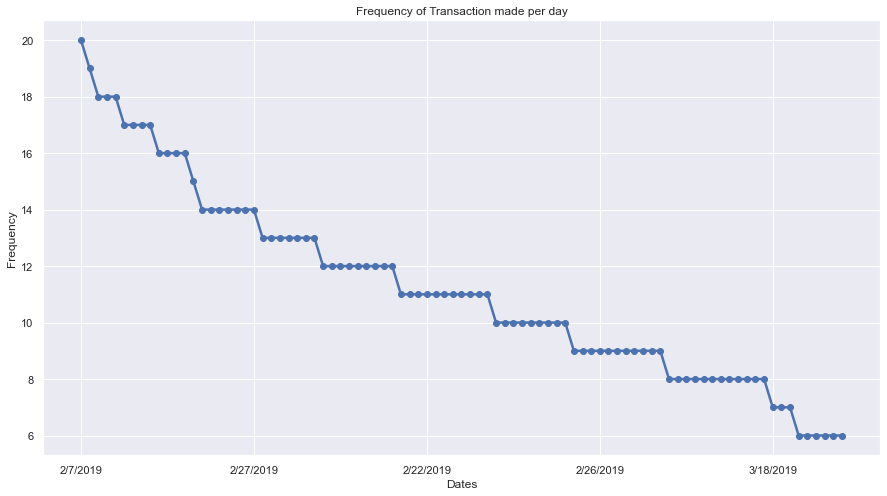

In [134]:
raw_df['Date'].value_counts(sort=True).plot(kind='line', linewidth=2.5,linestyle='-', marker='o', figsize=(15, 8))
plt.xlabel('Dates')
plt.ylabel('Frequency')
plt.title('Frequency of Transaction made per day', )

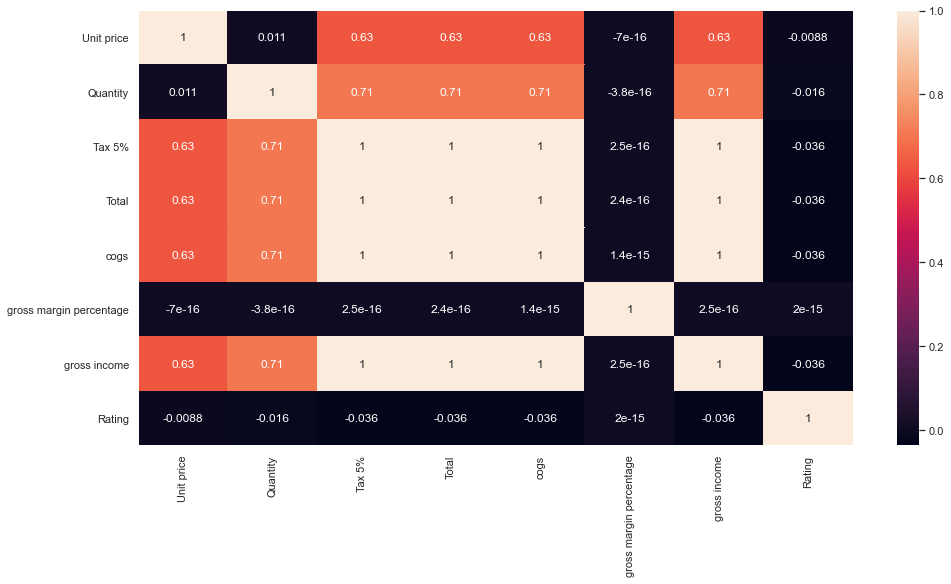

In [149]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)